In [50]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("train_cab.csv")
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [3]:
df.isnull().sum().sort_values(ascending=False)

passenger_count      55
fare_amount          24
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
dtype: int64

<AxesSubplot:>

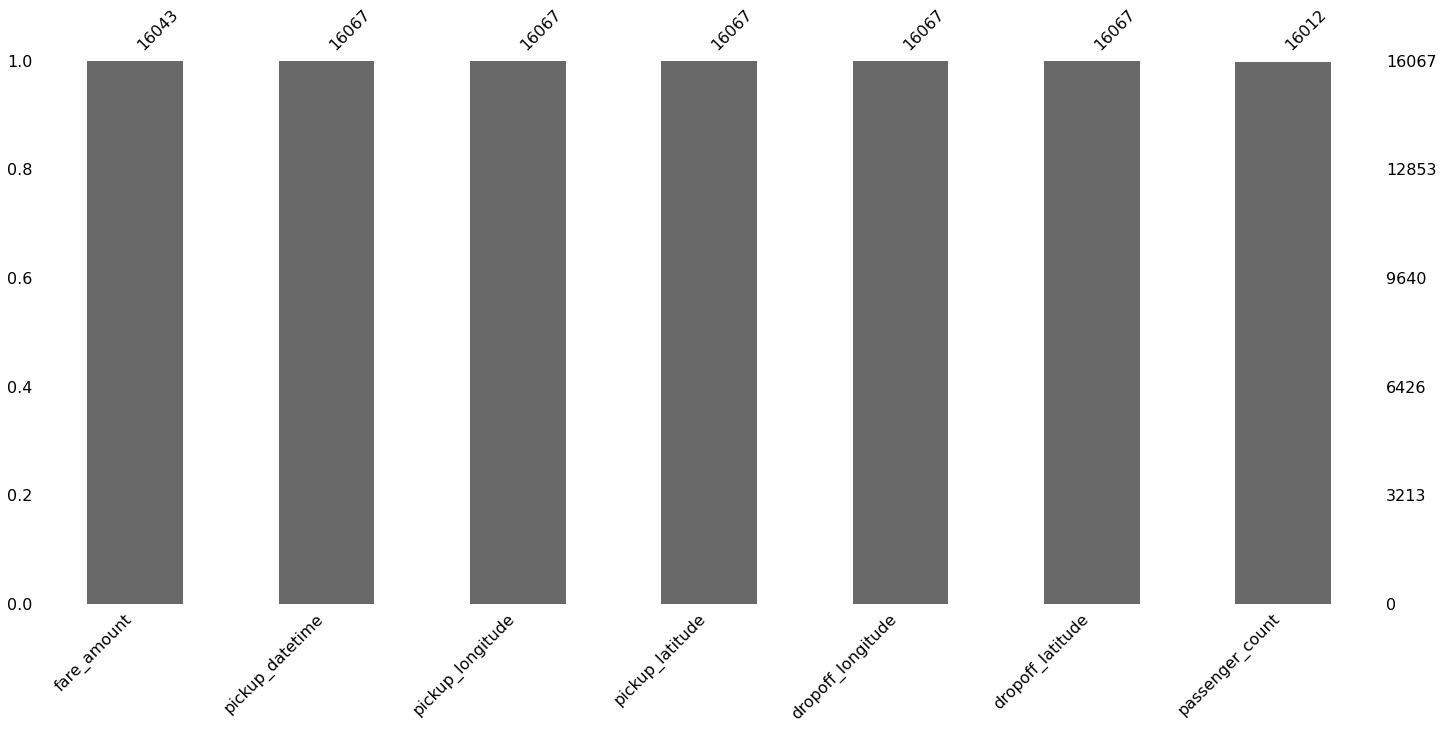

In [4]:
msno.bar(df)

In [5]:
df['fare_amount']=df['fare_amount'].replace(["54343", "4343", "-2.9", "-2.5", "0.01", "-3", "1.14", "0", "430-"], np.nan)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


#### List of Passenger Count

In [6]:
pd.unique(df['passenger_count'])

array([1.000e+00, 2.000e+00, 3.000e+00,       nan, 6.000e+00, 5.000e+00,
       4.000e+00, 2.360e+02, 4.560e+02, 5.334e+03, 0.000e+00, 5.350e+02,
       3.540e+02, 5.500e+01, 5.540e+02, 5.300e+01, 3.500e+01, 3.450e+02,
       5.345e+03, 5.360e+02, 4.300e+01, 5.800e+01, 5.370e+02, 8.700e+01,
       5.312e+02, 1.300e+00, 1.200e-01, 5.570e+02])

In [7]:
# Max passenger count
df['passenger_count'].max()

5345.0

#### Latitude & Longitude Range


Latitude Range -90 to 90


Longitude Range -180 to 180

In [8]:
print("Range of Pickup Latitude is ", (min(df['pickup_latitude']),max(df['pickup_latitude'])))

Range of Pickup Latitude is  (-74.006893, 401.083332)


In [9]:
df[df['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1.0


In [10]:
print("Range of Dropoff Latitude is ", (min(df['dropoff_latitude']),max(df['dropoff_longitude'])))

Range of Dropoff Latitude is  (-74.006377, 40.802437)


In [11]:
print("Range of Pickup Longtitude is ", (min(df['pickup_longitude']),max(df['pickup_longitude'])))

Range of Pickup Longtitude is  (-74.438233, 40.766125)


In [12]:
print("Range of Dropoff Longtitude is ", (min(df['dropoff_longitude']),max(df['dropoff_longitude'])))

Range of Dropoff Longtitude is  (-74.42933199999999, 40.802437)


#### Calculating distance using Haversine Formula

In [13]:
from haversine import haversine, Unit

km = []

for i in range(len(df)):
    pickup = (df['pickup_latitude'][i], df['pickup_longitude'][i]) # (lat, lon)
    dropoff = (df['dropoff_latitude'][i], df['dropoff_longitude'][i])
    km.append(haversine(pickup, dropoff)) # kilometers

In [14]:
df3 = df.assign(distance = km) 
df3

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030765
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450145
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389527
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799274
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999160
...,...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0,0.850046
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0,7.867649
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0,1.469108
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0,2.590040


#### Dropping rows whose distances is 0

In [15]:
df3 = df3.drop(df3[(df3['distance']==0)].index, axis=0)
df3.reset_index()

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030765
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450145
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389527
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799274
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999160
...,...,...,...,...,...,...,...,...,...
15603,16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0,0.850046
15604,16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0,7.867649
15605,16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0,1.469108
15606,16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0,2.590040


#### Dropping rows whose any of those both latitudes and longitudes are 0

In [16]:
df3 = df3.drop(df3[(df3['pickup_longitude']==0) & (df3['pickup_latitude']==0) | (df3['dropoff_longitude']==0) & (df3['dropoff_latitude']==0)].index, axis=0)
df3

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030765
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450145
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389527
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799274
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999160
...,...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0,0.850046
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0,7.867649
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0,1.469108
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0,2.590040


#### Replacing outlier values of both longitude and latitude with NaN

In [17]:
df3['pickup_longitude']=df3['pickup_longitude'].replace(-0.004093, np.nan)
df3['pickup_latitude']=df3['pickup_latitude'].replace([0.0335, 401.083332], np.nan)
df3['dropoff_longitude']=df3['dropoff_longitude'].replace([0, 0.016852, -7.9866399999999995], np.nan)
df3['dropoff_latitude']=df3['dropoff_latitude'].replace([0.01798, 0.728087], np.nan)
df3 = df3.reset_index(drop=True)
df3

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030765
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450145
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389527
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799274
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999160
...,...,...,...,...,...,...,...,...
15582,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0,0.850046
15583,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0,7.867649
15584,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0,1.469108
15585,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0,2.590040


In [18]:
df3 = df3.drop([df3.index[1145]]) 
df3

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030765
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450145
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389527
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799274
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999160
...,...,...,...,...,...,...,...,...
15582,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0,0.850046
15583,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0,7.867649
15584,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0,1.469108
15585,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0,2.590040


#### Filtering NaN values rows

In [19]:
df3[df3.isna().any(axis=1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0,1.253233
28,22.54,2015-06-21 21:46:34 UTC,-74.010483,40.717667,-73.985771,40.660366,NaN,6.703561
61,7.3,2011-11-07 10:47:40 UTC,-74.003919,40.753019,-73.992368,40.735362,NaN,2.191295
66,NaN,2015-05-12 23:51:42 UTC,-73.954796,40.779335,-73.944931,40.780087,1.0,0.834808
79,8.5,2013-06-14 08:27:43 UTC,-73.953710,40.790813,-73.957015,40.777676,NaN,1.487037
...,...,...,...,...,...,...,...,...
8068,6.9,2010-12-12 11:43:16 UTC,-73.983912,40.756814,-73.979796,40.765198,NaN,0.994628
9714,NaN,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184767
12656,NaN,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4.0,0.096377
15282,10.9,2012-05-12 17:58:00 UTC,-73.967183,40.772403,NaN,40.740677,1.0,6028.935107


In [20]:
df4 = df3.drop(['distance'], axis=1)
df4

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
15582,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
15583,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
15584,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
15585,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


#### Rechecking NaN values in dataset

In [21]:
df4.isna().sum()

fare_amount          31
pickup_datetime       0
pickup_longitude      0
pickup_latitude       1
dropoff_longitude     3
dropoff_latitude      1
passenger_count      55
dtype: int64

#### Rechecking dataset

In [22]:
df4.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

#### Converting fare_amount datatype to numeric

In [23]:
df4['fare_amount'] = pd.to_numeric(df4['fare_amount'], errors='coerce')
df4['fare_amount']

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
15582     6.5
15583    16.1
15584     8.5
15585     8.1
15586     8.5
Name: fare_amount, Length: 15586, dtype: float64

In [24]:
df4.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [25]:
df4

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
15582,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
15583,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
15584,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
15585,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


#### Unique passenger_count with sum

In [26]:
df4['passenger_count'].value_counts()

1.00       10907
2.00        2262
5.00        1017
3.00         657
4.00         319
6.00         295
0.00          54
43.00          2
456.00         1
0.12           1
1.30           1
531.20         1
345.00         1
87.00          1
55.00          1
58.00          1
35.00          1
535.00         1
536.00         1
537.00         1
554.00         1
53.00          1
5334.00        1
5345.00        1
557.00         1
354.00         1
Name: passenger_count, dtype: int64

#### Filtering outlier passenger_count

In [27]:
df5 = df4.loc[df4['passenger_count'].isin([0, 5345, 5334, 557, 554, 537, 536, 535, 531.2, 456, 354, 345, 108.2, 87, 58, 55, 53, 43, 43, 35, 12])]
df5

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
255,4.9,2010-07-12 09:44:33 UTC,-73.983249,40.734655,-73.991278,40.738918,456.0
282,6.1,2011-01-18 23:48:00 UTC,-74.006642,40.738927,-74.010828,40.717907,5334.0
303,34.0,2015-06-02 23:16:15 UTC,-73.974899,40.751095,-73.908546,40.881878,0.0
345,8.5,2013-06-18 10:27:05 UTC,-73.992108,40.764203,-73.973000,40.762695,535.0
373,8.1,2009-08-21 19:35:05 UTC,-73.960853,40.761557,-73.976335,40.748361,354.0
...,...,...,...,...,...,...,...
13771,8.1,2011-10-06 23:31:04 UTC,-73.999400,40.743800,-73.990400,40.724800,0.0
14426,3.3,2011-03-02 19:25:46 UTC,-73.948553,40.773972,-73.945098,40.778413,0.0
14830,4.9,2012-03-20 22:23:34 UTC,-73.971808,40.760143,-73.962027,40.767677,0.0
15052,6.5,2012-02-12 02:03:50 UTC,-73.999342,40.718872,-73.984112,40.725242,0.0


#### Replacing outlier with NaN in passenger_count

In [28]:
df4['passenger_count']=df4['passenger_count'].replace([0, 5345, 5334, 557, 554, 537, 536, 535, 531.2, 456, 354, 345, 108.2, 87, 58, 55, 53, 43, 43, 35, 12], np.nan)
df4 = df4.reset_index(drop=True)
df4

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
15581,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
15582,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
15583,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
15584,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


#### Rechecking NaN values

In [29]:
df4.isna().sum()

fare_amount           31
pickup_datetime        0
pickup_longitude       0
pickup_latitude        1
dropoff_longitude      3
dropoff_latitude       1
passenger_count      127
dtype: int64

In [30]:
df6 = df4[df4.isna().any(axis=1)]
df6

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
28,22.54,2015-06-21 21:46:34 UTC,-74.010483,40.717667,-73.985771,40.660366,NaN
61,7.30,2011-11-07 10:47:40 UTC,-74.003919,40.753019,-73.992368,40.735362,NaN
66,NaN,2015-05-12 23:51:42 UTC,-73.954796,40.779335,-73.944931,40.780087,1.0
79,8.50,2013-06-14 08:27:43 UTC,-73.953710,40.790813,-73.957015,40.777676,NaN
...,...,...,...,...,...,...,...
14829,4.90,2012-03-20 22:23:34 UTC,-73.971808,40.760143,-73.962027,40.767677,NaN
15051,6.50,2012-02-12 02:03:50 UTC,-73.999342,40.718872,-73.984112,40.725242,NaN
15090,6.50,2011-08-03 08:31:19 UTC,-73.991700,40.750100,-73.981000,40.750900,NaN
15281,10.90,2012-05-12 17:58:00 UTC,-73.967183,40.772403,NaN,40.740677,1.0


In [31]:
xdf = df4[["fare_amount", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count"]]
xdf

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...
15581,6.5,-74.008820,40.718757,-73.998865,40.719987,1.0
15582,16.1,-73.981310,40.781695,-74.014392,40.715527,2.0
15583,8.5,-73.972507,40.753417,-73.979577,40.765495,1.0
15584,8.1,-73.957027,40.765945,-73.981983,40.779560,1.0


#### Imputing NaN values with KNN Algorithm

In [32]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(xdf)
Xtrans = imputer.transform(xdf)

In [33]:
df7 = pd.DataFrame(Xtrans)
df7

,0,1,2,3,4,5
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...
15581,6.5,-74.008820,40.718757,-73.998865,40.719987,1.0
15582,16.1,-73.981310,40.781695,-74.014392,40.715527,2.0
15583,8.5,-73.972507,40.753417,-73.979577,40.765495,1.0
15584,8.1,-73.957027,40.765945,-73.981983,40.779560,1.0


#### Recalculating distances after KNN Imputation

In [34]:
from haversine import haversine, Unit

kms = []

for i in range(len(df7)):
    pickup = (df7[2][i], df7[1][i]) # (lat, lon)
    dropoff = (df7[4][i], df7[3][i])
    kms.append(haversine(pickup, dropoff)) # kilometers

In [35]:
df8 = df7.assign(distance = kms) 
df8

,0,1,2,3,4,5,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030765
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450145
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389527
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799274
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999160
...,...,...,...,...,...,...,...
15581,6.5,-74.008820,40.718757,-73.998865,40.719987,1.0,0.850046
15582,16.1,-73.981310,40.781695,-74.014392,40.715527,2.0,7.867649
15583,8.5,-73.972507,40.753417,-73.979577,40.765495,1.0,1.469108
15584,8.1,-73.957027,40.765945,-73.981983,40.779560,1.0,2.590040


In [36]:
df8[5].value_counts()

1.00    10933
2.00     2279
5.00     1017
3.00      658
4.00      319
6.00      295
1.20       19
1.80       15
1.40       13
2.20       11
1.60       10
2.40        5
3.60        4
2.60        2
2.80        2
0.12        1
3.40        1
3.20        1
1.30        1
Name: 5, dtype: int64

In [37]:
df8.loc[df8[5].isin([0.12])]

,0,1,2,3,4,5,distance
8601,11.5,-73.969835,40.753017,-73.99858,40.712927,0.12,5.073292


In [38]:
rounded = []

for i in range(len(df8)):
    rounded.append(round(df8[5].iloc[i]))

In [39]:
df9 = df8.assign(passenger_count = rounded) 
df9

,0,1,2,3,4,5,distance,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030765,1.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450145,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389527,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799274,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999160,1.0
...,...,...,...,...,...,...,...,...
15581,6.5,-74.008820,40.718757,-73.998865,40.719987,1.0,0.850046,1.0
15582,16.1,-73.981310,40.781695,-74.014392,40.715527,2.0,7.867649,2.0
15583,8.5,-73.972507,40.753417,-73.979577,40.765495,1.0,1.469108,1.0
15584,8.1,-73.957027,40.765945,-73.981983,40.779560,1.0,2.590040,1.0


In [40]:
df9['passenger_count'].value_counts()

1.0    10966
2.0     2320
5.0     1017
3.0      664
4.0      323
6.0      295
0.0        1
Name: passenger_count, dtype: int64

In [41]:
df9.loc[df9['passenger_count'].isin([0])]

,0,1,2,3,4,5,distance,passenger_count
8601,11.5,-73.969835,40.753017,-73.99858,40.712927,0.12,5.073292,0.0


In [42]:
df9['passenger_count']=df9['passenger_count'].replace(0, 1)
df9.loc[8601]

0                  11.500000
1                 -73.969835
2                  40.753017
3                 -73.998580
4                  40.712927
5                   0.120000
distance            5.073292
passenger_count     1.000000
Name: 8601, dtype: float64

In [43]:
df9 = df9.rename(columns={0: "Fare"})
df9

,Fare,1,2,3,4,5,distance,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030765,1.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450145,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389527,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799274,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999160,1.0
...,...,...,...,...,...,...,...,...
15581,6.5,-74.008820,40.718757,-73.998865,40.719987,1.0,0.850046,1.0
15582,16.1,-73.981310,40.781695,-74.014392,40.715527,2.0,7.867649,2.0
15583,8.5,-73.972507,40.753417,-73.979577,40.765495,1.0,1.469108,1.0
15584,8.1,-73.957027,40.765945,-73.981983,40.779560,1.0,2.590040,1.0


In [44]:
df4["pickup_datetime"]

0        2009-06-15 17:26:21 UTC
1        2010-01-05 16:52:16 UTC
2        2011-08-18 00:35:00 UTC
3        2012-04-21 04:30:42 UTC
4        2010-03-09 07:51:00 UTC
                  ...           
15581    2014-12-12 07:41:00 UTC
15582    2009-07-13 07:58:00 UTC
15583    2009-11-11 11:19:07 UTC
15584    2010-05-11 23:53:00 UTC
15585    2011-12-14 06:24:33 UTC
Name: pickup_datetime, Length: 15586, dtype: object

In [45]:
fin = pd.concat([df9, df4["pickup_datetime"]], axis=1)
fin

,Fare,1,2,3,4,5,distance,passenger_count,pickup_datetime
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030765,1.0,2009-06-15 17:26:21 UTC
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450145,1.0,2010-01-05 16:52:16 UTC
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389527,2.0,2011-08-18 00:35:00 UTC
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799274,1.0,2012-04-21 04:30:42 UTC
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999160,1.0,2010-03-09 07:51:00 UTC
...,...,...,...,...,...,...,...,...,...
15581,6.5,-74.008820,40.718757,-73.998865,40.719987,1.0,0.850046,1.0,2014-12-12 07:41:00 UTC
15582,16.1,-73.981310,40.781695,-74.014392,40.715527,2.0,7.867649,2.0,2009-07-13 07:58:00 UTC
15583,8.5,-73.972507,40.753417,-73.979577,40.765495,1.0,1.469108,1.0,2009-11-11 11:19:07 UTC
15584,8.1,-73.957027,40.765945,-73.981983,40.779560,1.0,2.590040,1.0,2010-05-11 23:53:00 UTC


In [46]:
fin = fin.drop([5], axis=1)
fin

,Fare,1,2,3,4,distance,passenger_count,pickup_datetime
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.030765,1.0,2009-06-15 17:26:21 UTC
1,16.9,-74.016048,40.711303,-73.979268,40.782004,8.450145,1.0,2010-01-05 16:52:16 UTC
2,5.7,-73.982738,40.761270,-73.991242,40.750562,1.389527,2.0,2011-08-18 00:35:00 UTC
3,7.7,-73.987130,40.733143,-73.991567,40.758092,2.799274,1.0,2012-04-21 04:30:42 UTC
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.999160,1.0,2010-03-09 07:51:00 UTC
...,...,...,...,...,...,...,...,...
15581,6.5,-74.008820,40.718757,-73.998865,40.719987,0.850046,1.0,2014-12-12 07:41:00 UTC
15582,16.1,-73.981310,40.781695,-74.014392,40.715527,7.867649,2.0,2009-07-13 07:58:00 UTC
15583,8.5,-73.972507,40.753417,-73.979577,40.765495,1.469108,1.0,2009-11-11 11:19:07 UTC
15584,8.1,-73.957027,40.765945,-73.981983,40.779560,2.590040,1.0,2010-05-11 23:53:00 UTC


In [47]:
fin = fin.rename(columns={1: "pickup_longitude", 2: "pickup_latitude", 3: "dropoff_longitude", 4: "dropoff_latitude"})
fin

,Fare,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,passenger_count,pickup_datetime
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.030765,1.0,2009-06-15 17:26:21 UTC
1,16.9,-74.016048,40.711303,-73.979268,40.782004,8.450145,1.0,2010-01-05 16:52:16 UTC
2,5.7,-73.982738,40.761270,-73.991242,40.750562,1.389527,2.0,2011-08-18 00:35:00 UTC
3,7.7,-73.987130,40.733143,-73.991567,40.758092,2.799274,1.0,2012-04-21 04:30:42 UTC
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.999160,1.0,2010-03-09 07:51:00 UTC
...,...,...,...,...,...,...,...,...
15581,6.5,-74.008820,40.718757,-73.998865,40.719987,0.850046,1.0,2014-12-12 07:41:00 UTC
15582,16.1,-73.981310,40.781695,-74.014392,40.715527,7.867649,2.0,2009-07-13 07:58:00 UTC
15583,8.5,-73.972507,40.753417,-73.979577,40.765495,1.469108,1.0,2009-11-11 11:19:07 UTC
15584,8.1,-73.957027,40.765945,-73.981983,40.779560,2.590040,1.0,2010-05-11 23:53:00 UTC


In [48]:
fin.isna().sum()

Fare                 0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
distance             0
passenger_count      0
pickup_datetime      0
dtype: int64

In [56]:
### Convert object to datetime

from datetime import datetime
import calendar
fin.pickup_datetime = pd.to_datetime(fin.pickup_datetime, errors='coerce')

In [58]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Fare               15586 non-null  float64            
 1   pickup_longitude   15586 non-null  float64            
 2   pickup_latitude    15586 non-null  float64            
 3   dropoff_longitude  15586 non-null  float64            
 4   dropoff_latitude   15586 non-null  float64            
 5   distance           15586 non-null  float64            
 6   passenger_count    15586 non-null  float64            
 7   pickup_datetime    15585 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 974.2 KB


In [59]:
fin['year']= fin['pickup_datetime'].dt.year
fin['Month']=fin['pickup_datetime'].dt.month
fin['Date']=fin['pickup_datetime'].dt.day
fin['Hour']=fin['pickup_datetime'].dt.hour
fin['Minute']=fin['pickup_datetime'].dt.minute
fin['Second']=fin['pickup_datetime'].dt.second
fin

,Fare,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,passenger_count,pickup_datetime,year,Month,Date,Hour,Minute,Second
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.030765,1.0,2009-06-15 17:26:21+00:00,2009.0,6.0,15.0,17.0,26.0,21.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,8.450145,1.0,2010-01-05 16:52:16+00:00,2010.0,1.0,5.0,16.0,52.0,16.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,1.389527,2.0,2011-08-18 00:35:00+00:00,2011.0,8.0,18.0,0.0,35.0,0.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,2.799274,1.0,2012-04-21 04:30:42+00:00,2012.0,4.0,21.0,4.0,30.0,42.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.999160,1.0,2010-03-09 07:51:00+00:00,2010.0,3.0,9.0,7.0,51.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,6.5,-74.008820,40.718757,-73.998865,40.719987,0.850046,1.0,2014-12-12 07:41:00+00:00,2014.0,12.0,12.0,7.0,41.0,0.0
15582,16.1,-73.981310,40.781695,-74.014392,40.715527,7.867649,2.0,2009-07-13 07:58:00+00:00,2009.0,7.0,13.0,7.0,58.0,0.0
15583,8.5,-73.972507,40.753417,-73.979577,40.765495,1.469108,1.0,2009-11-11 11:19:07+00:00,2009.0,11.0,11.0,11.0,19.0,7.0
15584,8.1,-73.957027,40.765945,-73.981983,40.779560,2.590040,1.0,2010-05-11 23:53:00+00:00,2010.0,5.0,11.0,23.0,53.0,0.0


In [60]:
fin = fin.drop(df[["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]], axis=1)
fin

,Fare,distance,passenger_count,year,Month,Date,Hour,Minute,Second
0,4.5,1.030765,1.0,2009.0,6.0,15.0,17.0,26.0,21.0
1,16.9,8.450145,1.0,2010.0,1.0,5.0,16.0,52.0,16.0
2,5.7,1.389527,2.0,2011.0,8.0,18.0,0.0,35.0,0.0
3,7.7,2.799274,1.0,2012.0,4.0,21.0,4.0,30.0,42.0
4,5.3,1.999160,1.0,2010.0,3.0,9.0,7.0,51.0,0.0
...,...,...,...,...,...,...,...,...,...
15581,6.5,0.850046,1.0,2014.0,12.0,12.0,7.0,41.0,0.0
15582,16.1,7.867649,2.0,2009.0,7.0,13.0,7.0,58.0,0.0
15583,8.5,1.469108,1.0,2009.0,11.0,11.0,11.0,19.0,7.0
15584,8.1,2.590040,1.0,2010.0,5.0,11.0,23.0,53.0,0.0


### Outlier Analysis

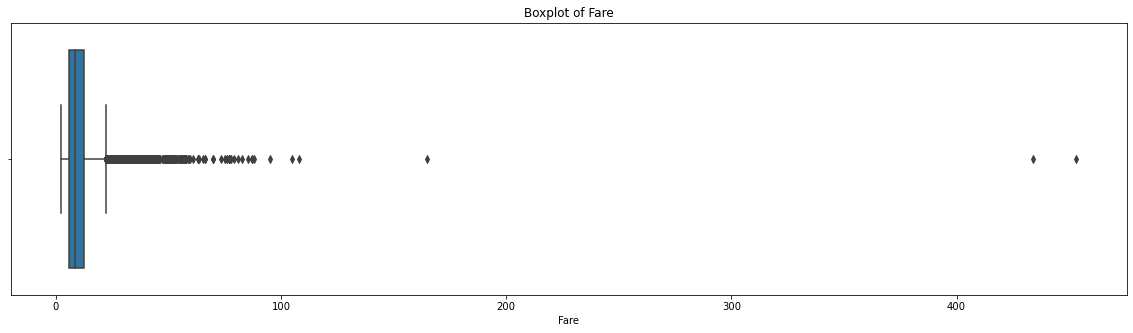

In [51]:
plt.figure(figsize=(20,5)) 
#plt.xlim(0,100)
sns.boxplot(x=fin['Fare'],data=fin,orient='h')
plt.title('Boxplot of Fare')
plt.show()

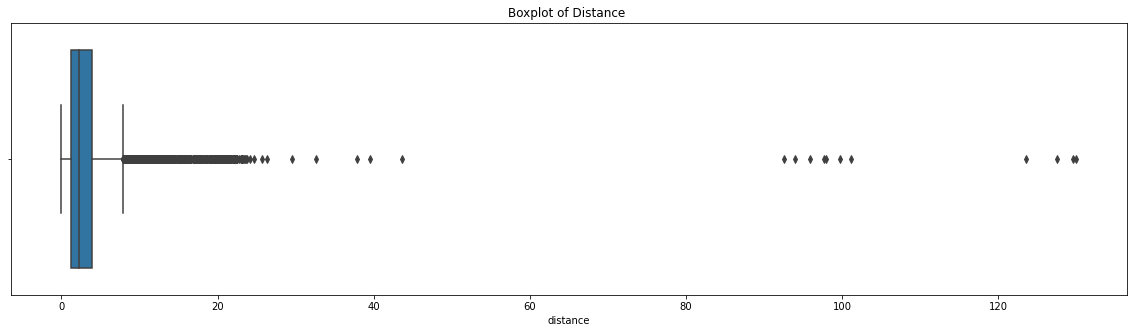

In [52]:
plt.figure(figsize=(20,5)) 
#plt.xlim(0,100)
sns.boxplot(x=fin['distance'],data=fin,orient='h')
plt.title('Boxplot of Distance ')
plt.show()

Some distances greater than 100 kms or maybe trips outside city



Bivariate Boxplots: Boxplot for Numerical Variable Vs Categorical Variable.

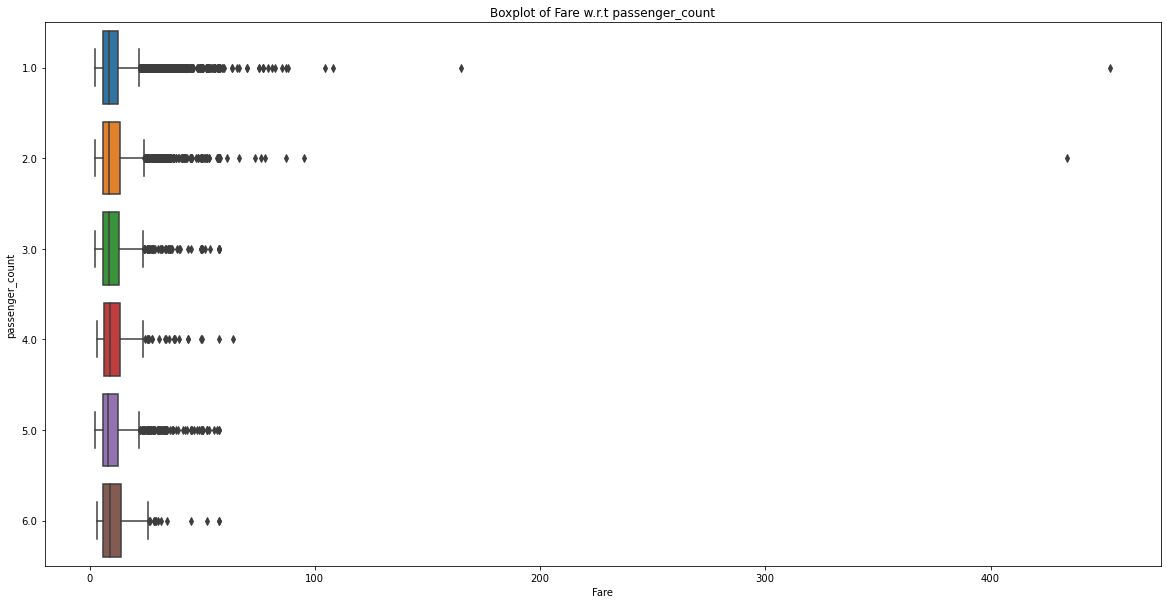

In [54]:
plt.figure(figsize=(20,10))
sns.boxplot(x=fin['Fare'],y=fin['passenger_count'],data=fin,orient='h')
plt.title('Boxplot of Fare w.r.t passenger_count')
plt.show()

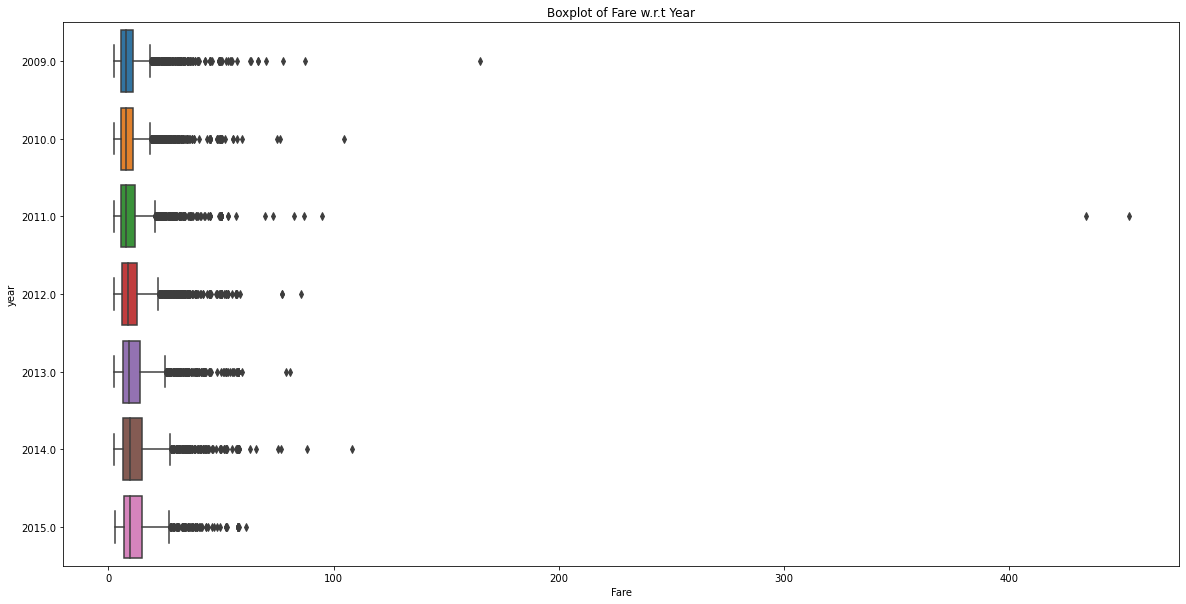

In [61]:
plt.figure(figsize=(20,10))
sns.boxplot(x=fin['Fare'],y=fin['year'],data=fin,orient='h')
plt.title('Boxplot of Fare w.r.t Year')
plt.show()

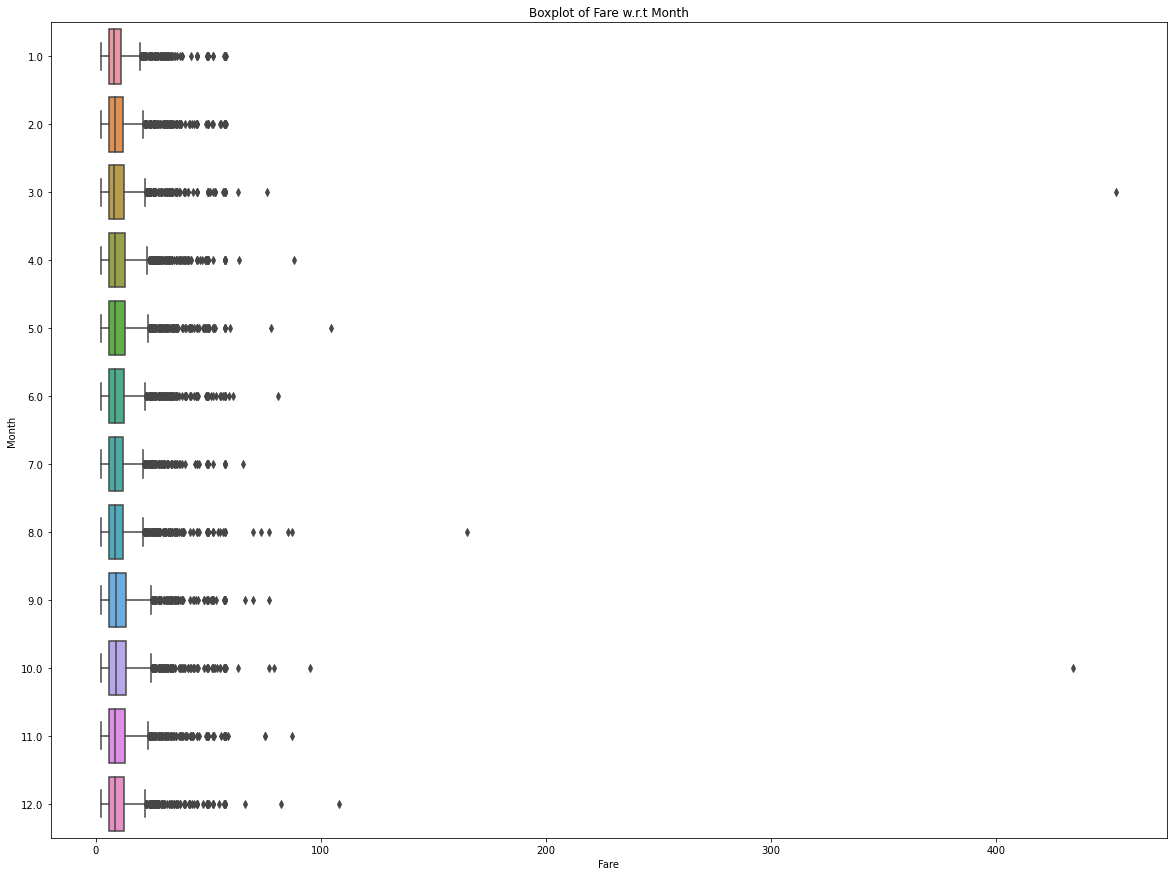

In [62]:
plt.figure(figsize=(20,15))
sns.boxplot(x=fin['Fare'],y=fin['Month'],data=fin,orient='h')
plt.title('Boxplot of Fare w.r.t Month')
plt.show()

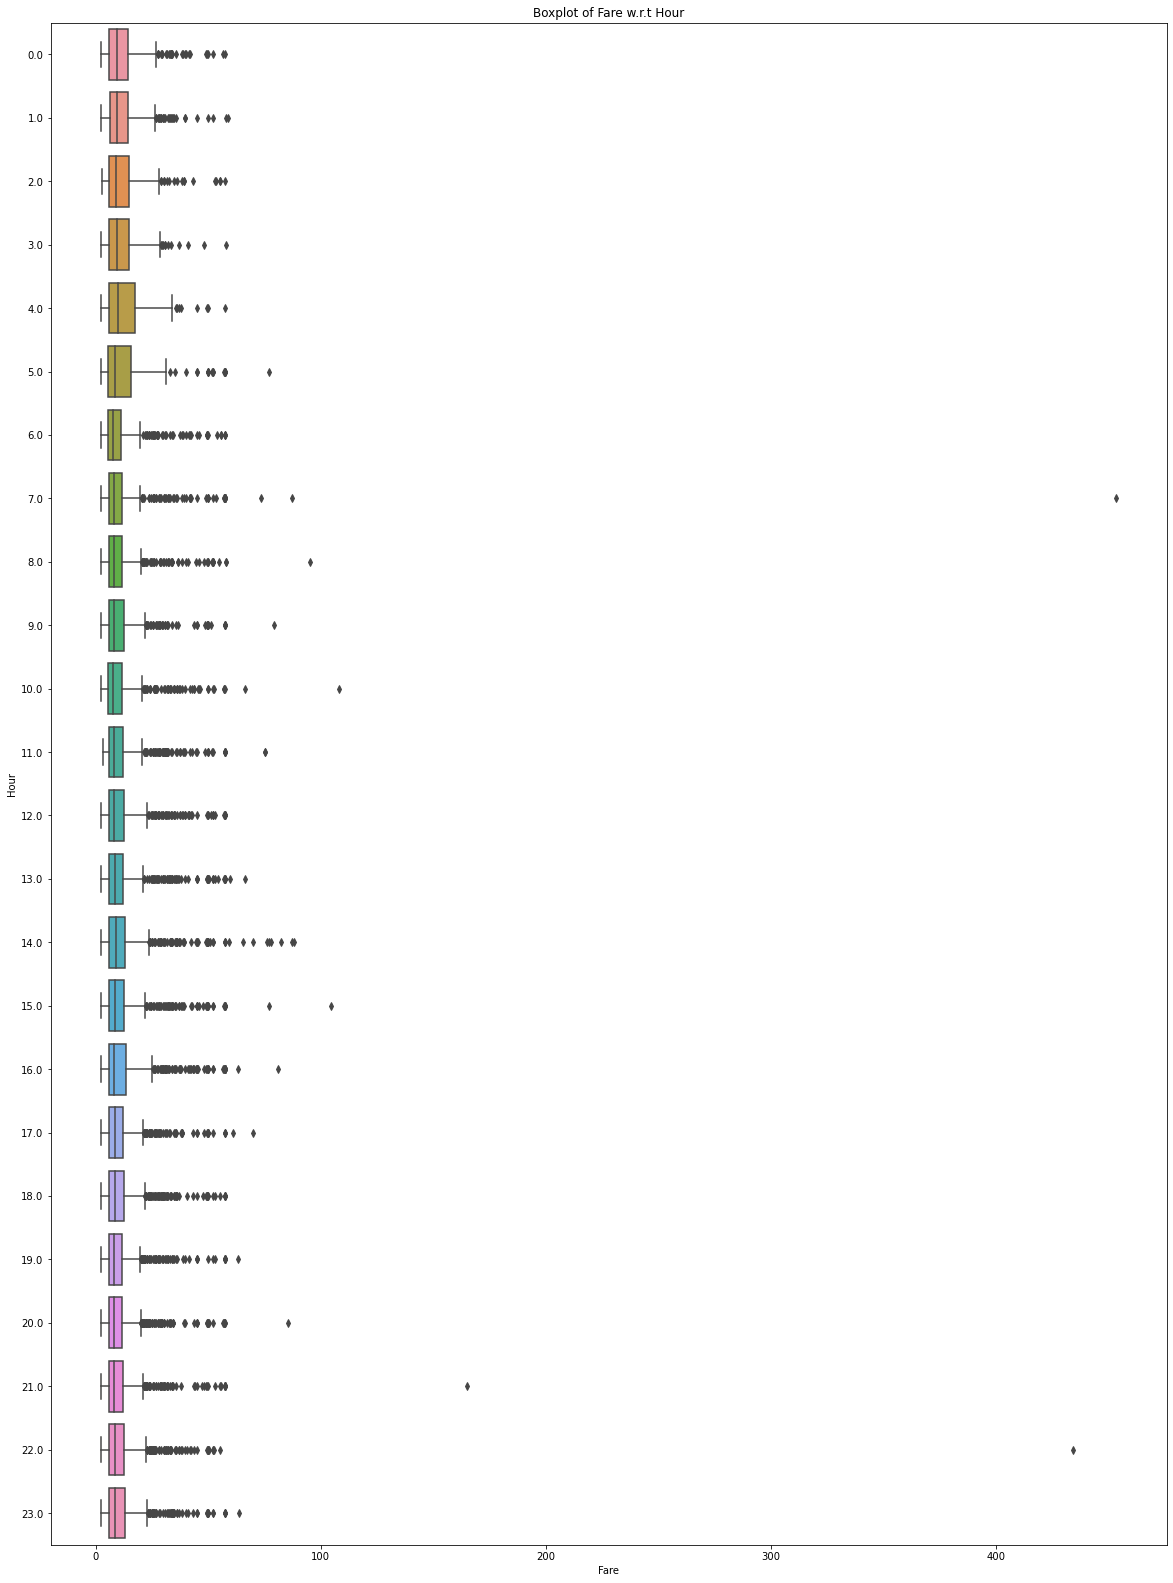

In [63]:
plt.figure(figsize=(20,28))
sns.boxplot(x=fin['Fare'],y=fin['Hour'],data=fin,orient='h')
plt.title('Boxplot of Fare w.r.t Hour')
plt.show()

#### Dropping Outliers

In [ ]:
# Remove the outliers 
for i in fin:
    print(i)
    q75, q25 = np.percentile(fin.loc[:,i], [75 ,25])
    print("75% ="+ str(q75))
    print("25% ="+ str(q25))
    iqr = q75 - q25
    print("IQR ="+ str(iqr))
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
            
# To remove the Outliers                    
fin = fin.drop(fin[fin.loc[:,i] < min].index)
fin = fin.drop(fin[fin.loc[:,i] > max].index)

#### Saving preprocessed data

In [ ]:
import csv
fin.to_csv('fin.csv', index=True)